In [1]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install h5netcdf 

  Using cached h5netcdf-1.4.0-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.4.0-py3-none-any.whl (50 kB)
Using cached h5py-3.12.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xarray

  Using cached xarray-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached xarray-2024.9.0-py3-none-any.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cftime

  Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import math

In [6]:
def contour_f(data,contourdata,levels=np.arange(0,11),ccmap='PuBu',extend='max',limite_NS=42,clevels=np.arange(230,300,15),titulo='OLR y pr',cbarlabel='pr  [mm day$^{-1}$]'):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    contourdata, lon = add_cyclic_point(contourdata, coord=lons)
    fig = plt.figure(figsize=(10, 6))

    ax = plt.axes(projection=ccrs.Robinson())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    cc=ax.contour(lon,lats,contourdata,levels=clevels,colors='k',transform=ccrs.PlateCarree())

    ax.clabel(cc, cc.levels, inline=True, fontsize=10)

    ax.set_extent([-180,180, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=13)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

### **<font color="Purple"> Datos históricos </font>**

In [7]:
fileu_era5 = 'u_daily_500.nc'
filetas_era5 = 't2m_daily.nc'

In [9]:
#archivo historical
u_ds = xr.open_dataset(fileu_era5)
u_era5 = u_ds['u']
# tas_ds=xr.open_dataset(filetas_era5)
# tas_era5=tas_ds['tas']

In [10]:
#Covertir K a °C
tas=tas-273.15

In [11]:
u_era5

<xarray.DataArray 'u' (time: 14761, level: 2, latitude: 59, longitude: 173)> Size: 2GB
[301331054 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 118kB 1979-01-01T11:30:00 ... 2019-05-31...
  * longitude  (longitude) float32 692B 195.8 196.5 197.2 ... 323.2 324.0 324.8
  * latitude   (latitude) float32 236B 44.25 43.5 42.75 42.0 ... 2.25 1.5 0.75
  * level      (level) float64 16B 200.0 500.0
Attributes:
    standard_name:  eastward_wind
    long_name:      U component of wind
    units:          m s**-1
    cell_methods:   day_of_year: mean

In [14]:
#Seleccionar solo el nivel de 200 hPa 
ua79 = u_era5.sel(level=200)
# tas79 = tas.where(tas.time.dt.year >= 1979, drop=True)

In [17]:
# Calcular promedio estacional
ua_estacion=ua79.groupby(ua79.time.dt.season).mean(dim='time') 
# tas_estacion=tas79.groupby(tas79.time.dt.season).mean(dim='time') 

In [18]:
lats=ua79.latitude
lons=ua79.longitude

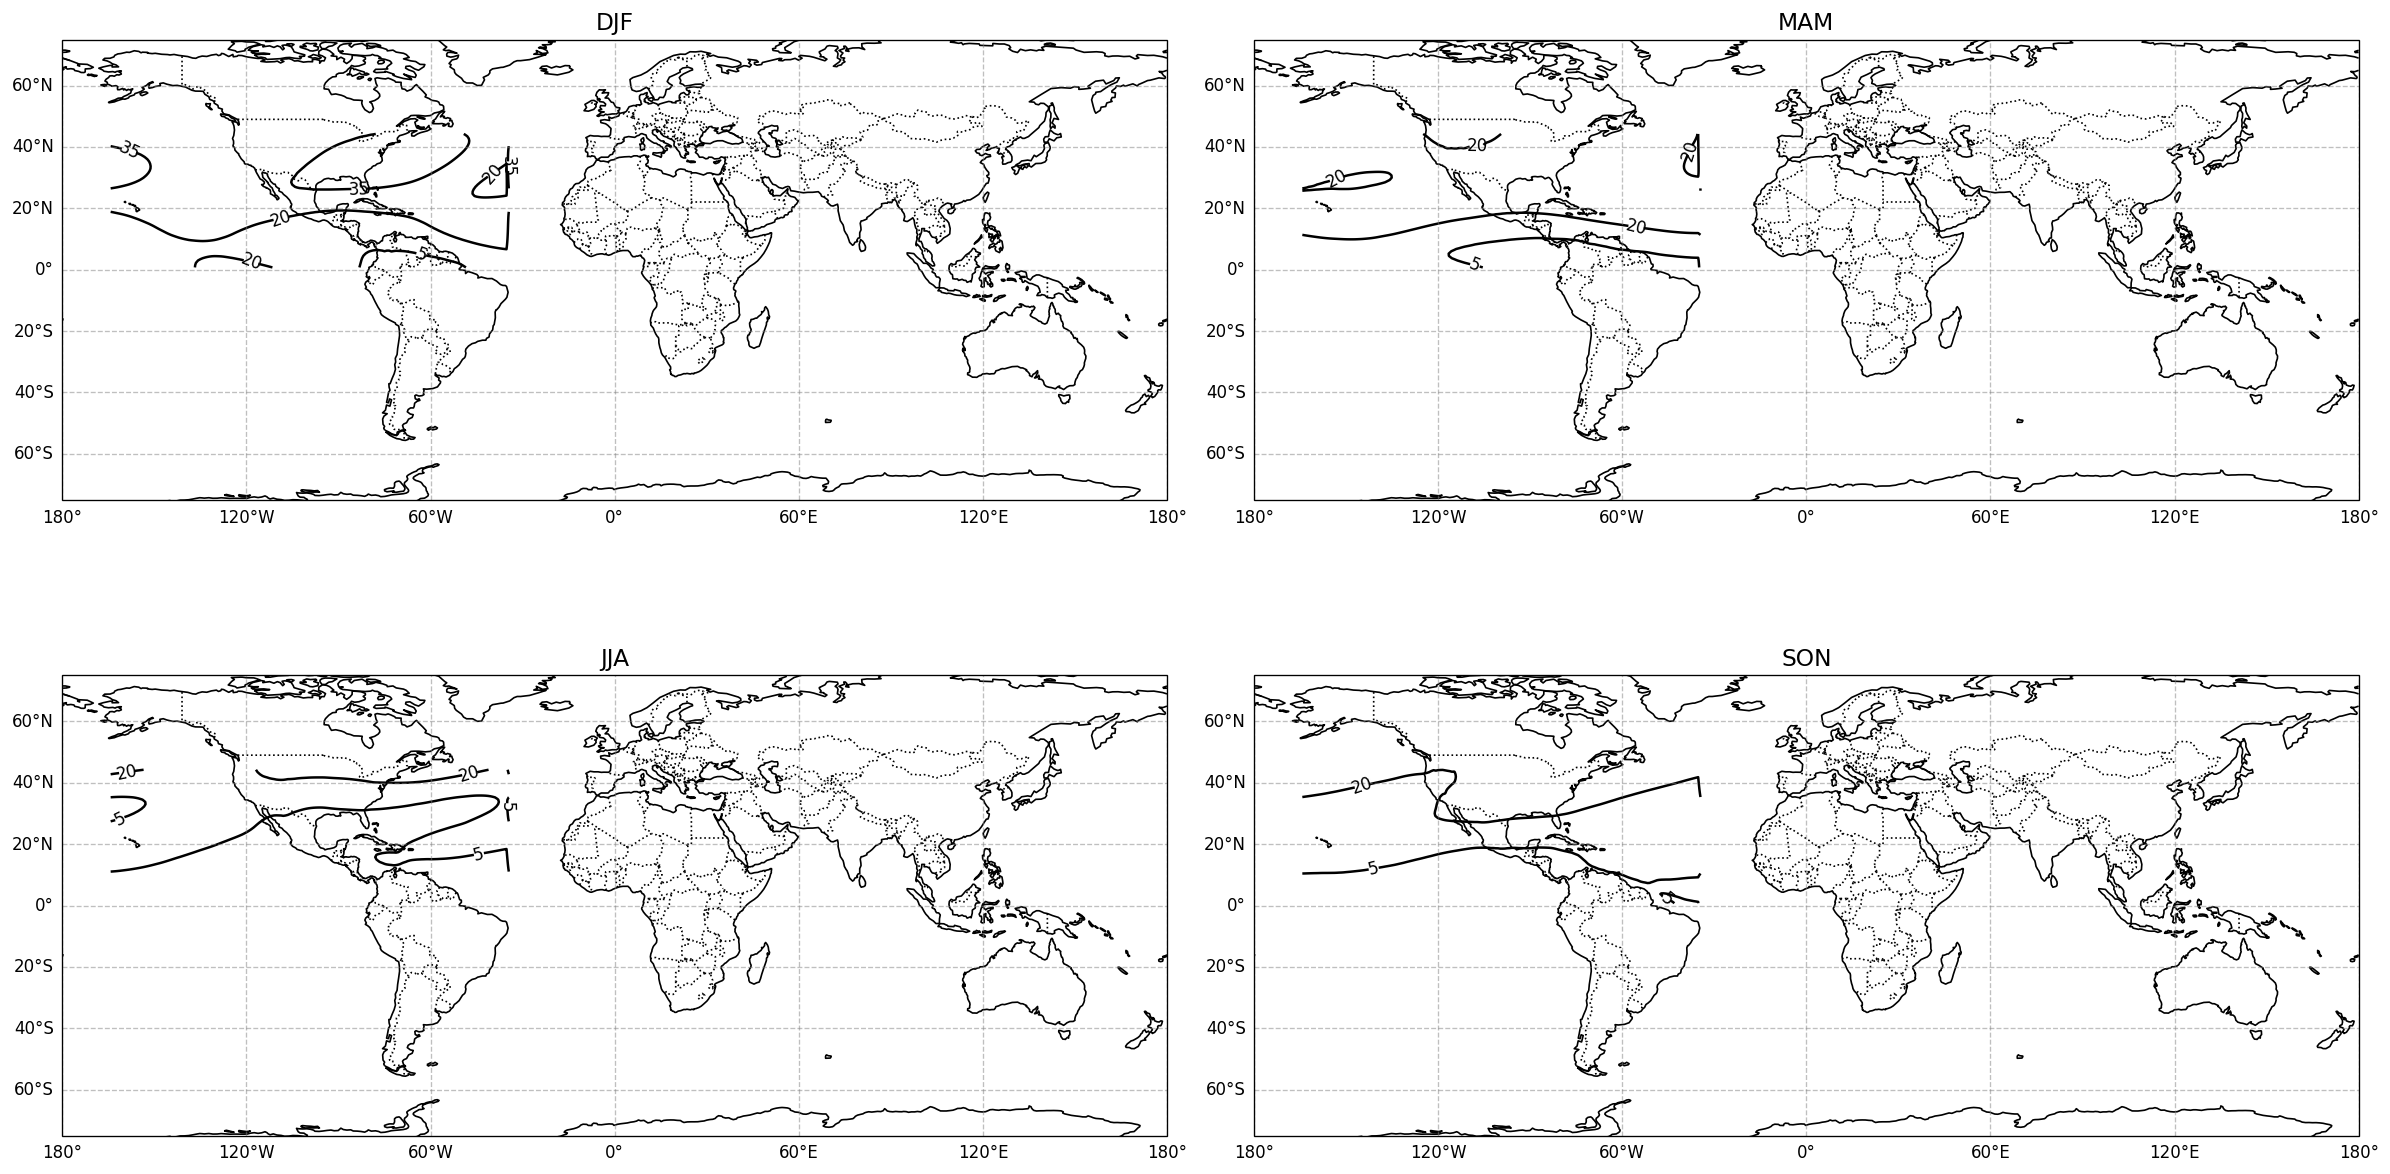

In [22]:
fig = plt.figure(figsize=(20, 11),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    mean_viento=ua_estacion.sel(season=season)
    # mean_temperatura=tas_estacion.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    dataviento, vlon = add_cyclic_point(mean_viento, coord=lons)
    # datatemp, lon = add_cyclic_point(mean_temperatura, coord=lons)
    
    # cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,30,1),cmap='coolwarm',alpha=0.5,extend='both',transform=ccrs.PlateCarree()) #temperatura
    csv=ax.contour(vlon,lats,dataviento,levels=np.arange(5,50,15),colors='k',transform=ccrs.PlateCarree()) #viento 
    ax.clabel(csv, csv.levels, inline=True, fontsize=10)
    
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([-180,180, -75, 75], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    plt.minorticks_on()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    # cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    # cbar.ax.set_xlabel('Temperatura superficial [°C]', fontsize=14)
    plt.title(season,fontsize=14)
    #plt.savefig(f"figura_{season}.png")
plt.tight_layout(h_pad=2,pad=1)
plt.show()

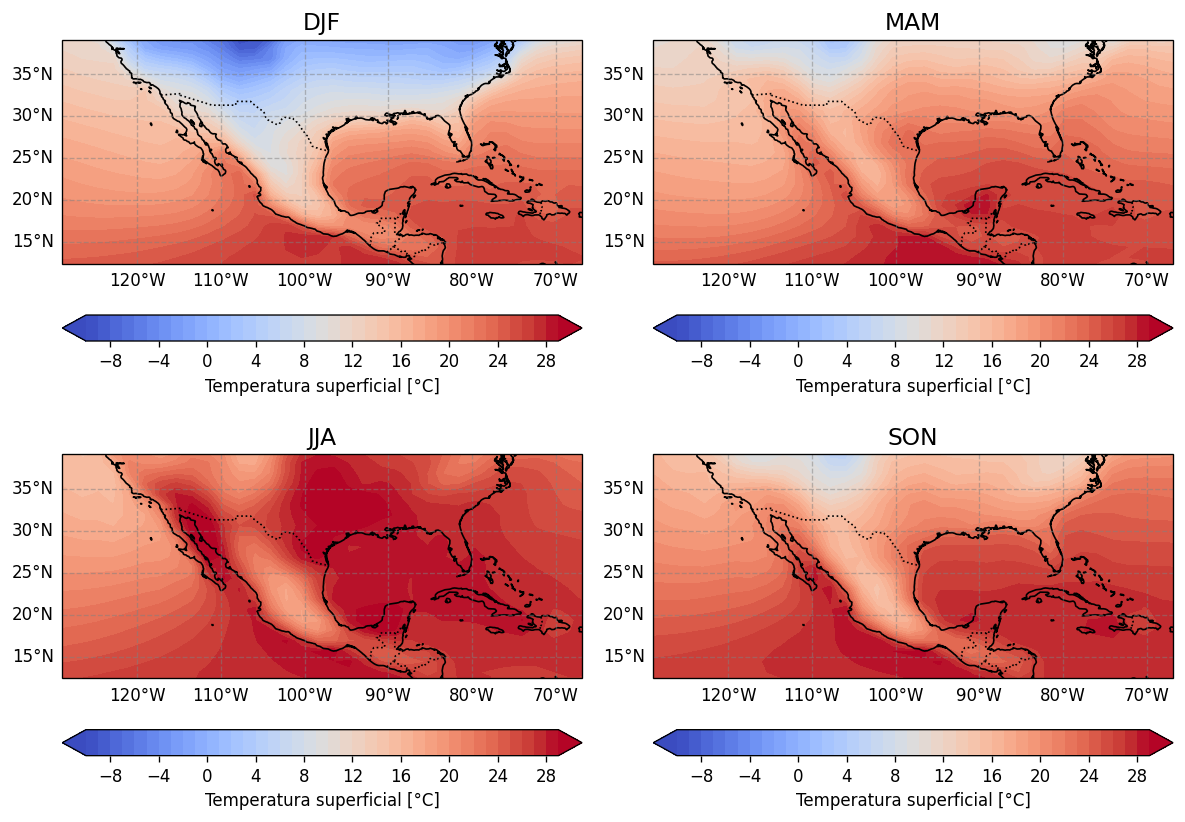

In [38]:
fig = plt.figure(figsize=(10,7),dpi=120)
plt.subplots_adjust(wspace=0.35, hspace=0.35)

orden_n = ["DJF","MAM","JJA","SON"]

for iseason,season in enumerate(orden_n):
    mean_viento=magnitud.sel(season=season)
    mean_temperatura=tas_estacion.sel(season=season)
    
    ax = fig.add_subplot(2, 2, 1+iseason, projection=ccrs.PlateCarree())
    ax.coastlines()

    dataviento, vlon = add_cyclic_point(mean_viento, coord=lons)
    datatemp, lon = add_cyclic_point(mean_temperatura, coord=lons)
    
    cs=ax.contourf(lon,lats,datatemp,levels=np.arange(-10,30,1),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree()) #temperatura
    #csv=ax.contour(vlon,vlats,dataviento,levels=np.arange(5,40,1) ,colors='k', linewidths=0.5,transform=ccrs.PlateCarree()) #viento 
    ax.clabel(csv, csv.levels, inline=True, fontsize=10)
    
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_extent([231.08,293.13, 12.41,39.13], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.5, linestyle='--')
    ax.xlabels_top = False
    gl.top_labels = gl.right_labels = False
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1)
    cbar.ax.set_xlabel('Temperatura superficial [°C]')
    plt.title(season,fontsize=14)

plt.tight_layout(h_pad=2)
plt.show()

#### CAOS